# Sports car prices

Author : Mutswari Unarine <br>
Date : 07 April 2023 <br>
Source : <a href="https://www.kaggle.com/datasets/rkiattisak/sports-car-prices-dataset">Kaggle</a> <br>
Github url :  <a href="https://github.com/unis230">Unarine Mutswari</a> 

## 1. Importing libraries 

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statistics
import math
import scipy.stats
from scipy.stats import linregress

In [2]:
pf=pd.read_csv('Sport_car.csv')
print(pf.to_string())

           Car Make                      Car Model  Year       Engine Size (L) Horsepower Torque (lb-ft) 0-60 MPH Time (seconds) Price (in USD)
0           Porsche                            911  2022                     3        379            331                       4        101,200
1       Lamborghini                        Huracan  2021                   5.2        630            443                     2.8        274,390
2           Ferrari                        488 GTB  2022                   3.9        661            561                       3        333,750
3              Audi                             R8  2022                   5.2        562            406                     3.2        142,700
4           McLaren                           720S  2021                     4        710            568                     2.7        298,000
5               BMW                             M8  2022                   4.4        617            553                     3.1        

## 2. Cleaning data

<img src="Data-Cleaning.jpg" alt="Trulli" width="250" height="150">

### Cleaning empty cells

In [4]:
pf.dropna(inplace = True)

In [5]:
print(pf.to_string())

           Car Make                      Car Model  Year       Engine Size (L) Horsepower Torque (lb-ft) 0-60 MPH Time (seconds) Price (in USD)
0           Porsche                            911  2022                     3        379            331                       4        101,200
1       Lamborghini                        Huracan  2021                   5.2        630            443                     2.8        274,390
2           Ferrari                        488 GTB  2022                   3.9        661            561                       3        333,750
3              Audi                             R8  2022                   5.2        562            406                     3.2        142,700
4           McLaren                           720S  2021                     4        710            568                     2.7        298,000
5               BMW                             M8  2022                   4.4        617            553                     3.1        

### Cleaning wrong data

In [6]:
for x in pf.index:
  if pf.loc[x, "Engine Size (L)"]=='Electric' or pf.loc[x, "Engine Size (L)"]=='Electric Motor':
    pf.drop(x, inplace = True)
  elif pf.loc[x, "Engine Size (L)"]=='1.5 + Electric' or pf.loc[x, "Engine Size (L)"]=='2.0 (Electric)':
    pf.drop(x, inplace = True)
  elif pf.loc[x, "Engine Size (L)"]=='Electric (tri-motor)' or pf.loc[x, "Engine Size (L)"]=='Electric (93 kWh)':
    pf.drop(x, inplace = True)
  elif pf.loc[x, "Engine Size (L)"]=='Electric (100 kWh)' or pf.loc[x, "Engine Size (L)"]=='Hybrid':
    pf.drop(x, inplace = True)
  elif pf.loc[x, "Engine Size (L)"]=='Hybrid (4.0)' or pf.loc[x, "Engine Size (L)"]=='4.0 (Hybrid)':
    pf.drop(x, inplace = True)
  elif pf.loc[x, "Engine Size (L)"]=='0.0' or pf.loc[x, "Engine Size (L)"]=='4.0 (Hybrid)':
    pf.drop(x, inplace = True)

In [7]:
for x in pf.index:
  if pf.loc[x, "Horsepower"]=='1,000+' or pf.loc[x, "Horsepower"]=='10,000+':
    pf.drop(x, inplace = True)

In [8]:
for x in pf.index:
  if pf.loc[x, "Torque (lb-ft)"]=='1,000+' or pf.loc[x, "Torque (lb-ft)"]=='10,000+':
    pf.drop(x, inplace = True)
  elif pf.loc[x, "Torque (lb-ft)"]=='-' :
    pf.drop(x, inplace = True)

In [9]:
for x in pf.index:
  if pf.loc[x, "0-60 MPH Time (seconds)"]=='<1.9':
    pf.drop(x, inplace = True)

### Removing Duplicates

In [11]:
print(pf.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
1000     True
1001     True
1002    False
1004     True
1005    False
Length: 948, dtype: bool


In [13]:
pf.drop_duplicates(inplace = True)

In [14]:
print(pf.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
996     False
998     False
999     False
1002    False
1005    False
Length: 665, dtype: bool


## Cleaning wrong data formats

In [15]:
pf['Price (in USD)'] =pf['Price (in USD)'].str.replace(',','')
pf['Price (in USD)'] = pf['Price (in USD)'].astype(int)

In [16]:
pf['Torque (lb-ft)'] =pf['Torque (lb-ft)'].str.replace(',','')
pf['Torque (lb-ft)'] = pf['Torque (lb-ft)'].astype(int)

In [17]:
pf['Horsepower'] =pf['Horsepower'].str.replace(',','')
pf['Horsepower'] = pf['Horsepower'].astype(int)

In [18]:
pf['Engine Size (L)'] = pf['Engine Size (L)'].astype(float)
	

In [19]:
pf['0-60 MPH Time (seconds)'] = pf['0-60 MPH Time (seconds)'].astype(float)
	

# <span style='color:Green'> Clean data</span>

In [20]:

pd.set_option('display.max_rows', None) # display all rows
pd.set_option('display.max_columns', None) # display all columns
pd.set_option('display.width', None) # set the width of the display to fit the screen
pd.set_option('display.max_colwidth', None) # display the full contents of each column


# display the dataframe
display(pf)


,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3.0,379,331,4.0,101200
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,274390
2,Ferrari,488 GTB,2022,3.9,661,561,3.0,333750
3,Audi,R8,2022,5.2,562,406,3.2,142700
4,McLaren,720S,2021,4.0,710,568,2.7,298000
5,BMW,M8,2022,4.4,617,553,3.1,130000
6,Mercedes-Benz,AMG GT,2021,4.0,523,494,3.8,118500
7,Chevrolet,Corvette,2021,6.2,490,465,2.8,59900
8,Ford,Mustang Shelby GT500,2022,5.2,760,625,3.5,81000
9,Nissan,GT-R Nismo,2021,3.8,600,481,2.5,212000


# Statistics Calculations

## Descriptive Statistics

In [21]:
pf.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
count,665.00000,665.00000,665.00000,665.00000,665.00000,665.00000
mean,2021.12632,4.42842,593.59098,519.24662,3.65173,339908.61203
std,2.41400,1.44463,428.26889,322.17925,0.73277,719432.06559
min,1965.00000,0.00000,181.00000,151.00000,1.90000,25000.00000
25%,2021.00000,3.50000,444.00000,384.00000,3.10000,69000.00000
50%,2021.00000,4.00000,573.00000,479.00000,3.50000,115000.00000
75%,2022.00000,6.00000,650.00000,590.00000,4.00000,222500.00000
max,2023.00000,8.40000,10000.00000,7376.00000,6.50000,5200000.00000


### Mode 

In [22]:
mode_pf = pf.mode().iloc[0]
print("\nMode of entire DataFrame:\n", mode_pf)



Mode of entire DataFrame:
 Car Make                   Porsche
Car Model                       GT
Year                          2021
Engine Size (L)                4.0
Horsepower                     503
Torque (lb-ft)                 443
0-60 MPH Time (seconds)        3.5
Price (in USD)             3000000
Name: 0, dtype: object


### Skewness

In [23]:
sk = pf.select_dtypes(include='number').agg('skew')
print("\nSkewness of  :\n",sk)


Skewness of  :
 Year                      -19.281984
Engine Size (L)             0.404201
Horsepower                 16.281461
Torque (lb-ft)             14.803745
0-60 MPH Time (seconds)     0.576859
Price (in USD)              3.779490
dtype: float64


### Standard error

In [24]:
se = pf.select_dtypes(include='number').agg('sem')
print("\nStandard error of  :\n",se)



Standard error of  :
 Year                           0.093611
Engine Size (L)                0.056020
Horsepower                    16.607555
Torque (lb-ft)                12.493576
0-60 MPH Time (seconds)        0.028416
Price (in USD)             27898.378884
dtype: float64


### Kurtosis 


In [25]:
kurt = pf.select_dtypes(include='number').agg('kurtosis')
print("\nkurtosis of  :\n",kurt)



kurtosis of  :
 Year                       441.875742
Engine Size (L)             -0.358013
Horsepower                 351.332547
Torque (lb-ft)             309.422224
0-60 MPH Time (seconds)      0.134933
Price (in USD)              14.324670
dtype: float64


### Geometric mean


In [26]:
def geo_mean(nums):
    log_vals = np.log(nums)
    return np.exp(log_vals.mean())

numeric_cols = pf.select_dtypes(include=np.number).columns
geo_means = pf[numeric_cols].apply(geo_mean)

print(geo_means)

Year                         2021.124854
Engine Size (L)                 0.000000
Horsepower                    547.995186
Torque (lb-ft)                482.976722
0-60 MPH Time (seconds)         3.580638
Price (in USD)             148731.411958
dtype: float64


C:\Users\Azwihangwisi\ana\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


### Range

In [27]:
numeric_cols = pf.select_dtypes(include='number')

range_cols = numeric_cols.max() - numeric_cols.min()

print('Range of numeric columns:')
print(range_cols)

Range of numeric columns:
Year                            58.0
Engine Size (L)                  8.4
Horsepower                    9819.0
Torque (lb-ft)                7225.0
0-60 MPH Time (seconds)          4.6
Price (in USD)             5175000.0
dtype: float64


### Interquartile Range

In [28]:
### Interquartile
numeric_cols = pf.select_dtypes(include='number')


q1 = numeric_cols.quantile(0.25)
q3 = numeric_cols.quantile(0.75)
iqr = q3 - q1

print('Interquartile Range of numeric columns:')
print(iqr)


Interquartile Range of numeric columns:
Year                            1.0
Engine Size (L)                 2.5
Horsepower                    206.0
Torque (lb-ft)                206.0
0-60 MPH Time (seconds)         0.9
Price (in USD)             153500.0
dtype: float64


### Variance

In [29]:
numeric_cols = pf.select_dtypes(include='number')

var_cols = numeric_cols.var()

print('Variance of numeric columns:')
print(var_cols)

Variance of numeric columns:
Year                       5.827394e+00
Engine Size (L)            2.086947e+00
Horsepower                 1.834142e+05
Torque (lb-ft)             1.037995e+05
0-60 MPH Time (seconds)    5.369586e-01
Price (in USD)             5.175825e+11
dtype: float64


### Outliers

In [30]:



numeric_cols = pf.select_dtypes(include='number')

# calculate the IQR of each numeric column
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# detect outliers in each numeric column
outliers = ((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR)))

print('Outliers of numeric columns:')
print(outliers)






Outliers of numeric columns:
       Year  Engine Size (L)  Horsepower  Torque (lb-ft)  \
0     False            False       False           False   
1     False            False       False           False   
2     False            False       False           False   
3     False            False       False           False   
4     False            False       False           False   
5     False            False       False           False   
6     False            False       False           False   
7     False            False       False           False   
8     False            False       False           False   
9     False            False       False           False   
10    False            False       False           False   
11    False            False        True            True   
12    False            False       False           False   
13    False            False       False           False   
14    False            False        True            True   
15    False

### Boxplots

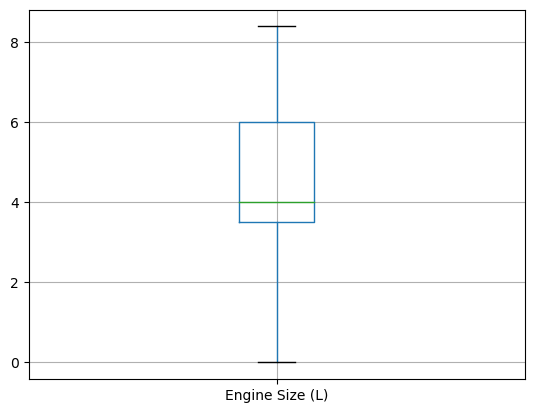

In [31]:


# draw a box plot of the column
boxplot =pf.boxplot('Engine Size (L)')

# show the plot
plt.show()

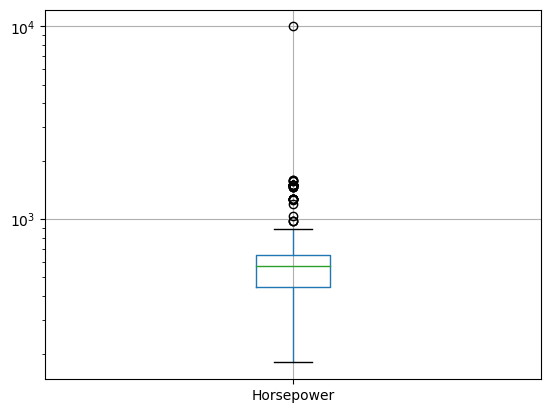

In [32]:

# draw a box plot of the column
boxplot =pf.boxplot('Horsepower')

# show the plot
plt.semilogy()
plt.show()

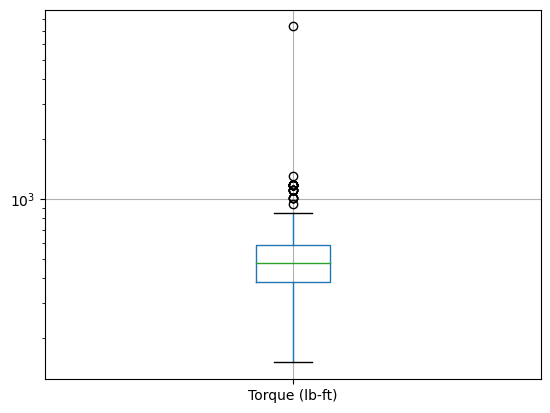

In [33]:
# draw a box plot of the column
boxplot =pf.boxplot('Torque (lb-ft)')

# show the plot
plt.semilogy()
plt.show()

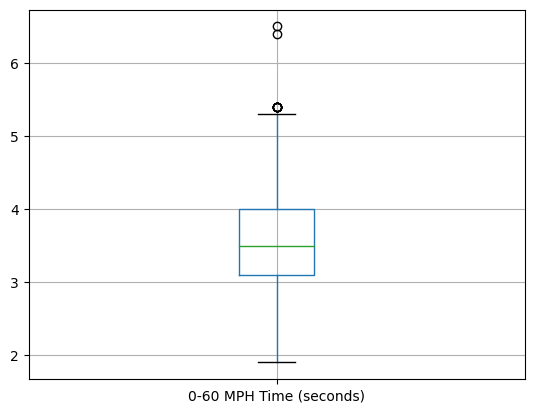

In [34]:
# draw a box plot of the column
boxplot =pf.boxplot('0-60 MPH Time (seconds)')

# show the plot
plt.show()


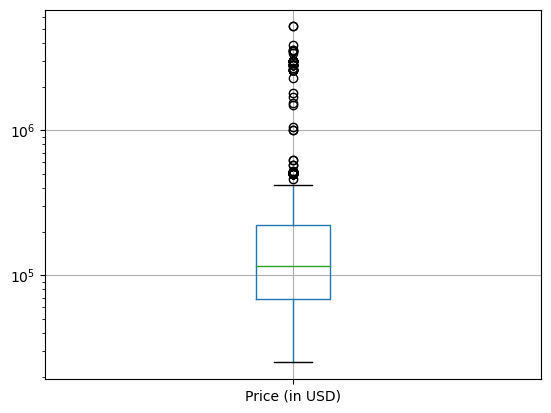

In [35]:
  # draw a box plot of the column
boxplot =pf.boxplot('Price (in USD)')

# show the plot
plt.semilogy()
plt.show()


### Covariance matrix

In [36]:
numeric_cols = pf.select_dtypes(include='number')
# calculate the covariance matrix between columns
covariance_matrix = numeric_cols.cov()

# display the covariance matrix
print("Covariance Matrix:")
print(covariance_matrix)



Covariance Matrix:
                                  Year  Engine Size (L)    Horsepower  \
Year                          5.827394        -0.551638  1.160897e+01   
Engine Size (L)              -0.551638         2.086947  1.417077e+02   
Horsepower                   11.608973       141.707727  1.834142e+05   
Torque (lb-ft)               11.887476       115.550812  1.350268e+05   
0-60 MPH Time (seconds)       0.017251        -0.438792 -1.453306e+02   
Price (in USD)          -104067.113570    411960.945682  1.222393e+08   

                         Torque (lb-ft)  0-60 MPH Time (seconds)  \
Year                       1.188748e+01                 0.017251   
Engine Size (L)            1.155508e+02                -0.438792   
Horsepower                 1.350268e+05              -145.330617   
Torque (lb-ft)             1.037995e+05              -109.350728   
0-60 MPH Time (seconds)   -1.093507e+02                 0.536959   
Price (in USD)             9.131675e+07           -247887.393

### Correlation matrix

In [37]:
numeric_cols = pf.select_dtypes(include='number')

# calculate the correlation matrix between columns
correlation_matrix = numeric_cols.corr()

# display the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                             Year  Engine Size (L)  Horsepower  \
Year                     1.000000        -0.158183    0.011229   
Engine Size (L)         -0.158183         1.000000    0.229045   
Horsepower               0.011229         0.229045    1.000000   
Torque (lb-ft)           0.015285         0.248267    0.978601   
0-60 MPH Time (seconds)  0.009752        -0.414507   -0.463095   
Price (in USD)          -0.059922         0.396379    0.396739   

                         Torque (lb-ft)  0-60 MPH Time (seconds)  \
Year                           0.015285                 0.009752   
Engine Size (L)                0.248267                -0.414507   
Horsepower                     0.978601                -0.463095   
Torque (lb-ft)                 1.000000                -0.463184   
0-60 MPH Time (seconds)       -0.463184                 1.000000   
Price (in USD)                 0.393970                -0.470213   

                         Price (in USD)

### Scatter plot with Regression Line

Regression line formula: y = 197398.8489130813x + -534256.6062618544


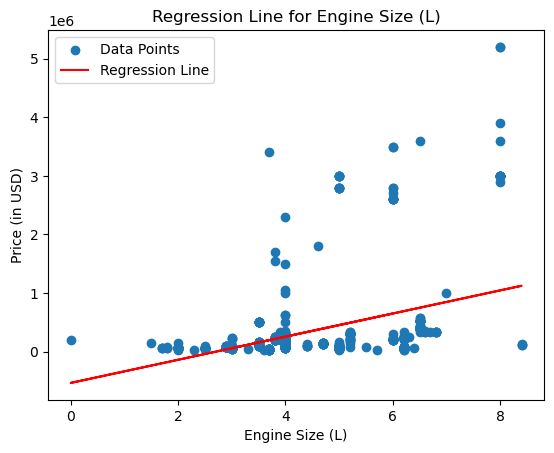

In [38]:
# Calculate the regression line formula
slope, intercept, r_value, p_value, std_err = linregress(pf['Engine Size (L)'], pf['Price (in USD)'])

# Display the regression line formula
print(f"Regression line formula: y = {slope}x + {intercept}")

# Calculate the regression line
regression_line = slope * pf['Engine Size (L)'] + intercept

# Plot the data points and the regression line
plt.scatter(pf['Engine Size (L)'], pf['Price (in USD)'], label='Data Points')
plt.plot(pf['Engine Size (L)'], regression_line, color='red', label='Regression Line')
plt.xlabel('Engine Size (L)')
plt.ylabel('Price (in USD)')
plt.title('Regression Line for Engine Size (L)')
plt.legend()

plt.show()

Regression line formula: y = 666.4659431982557x + -55699.55862585426


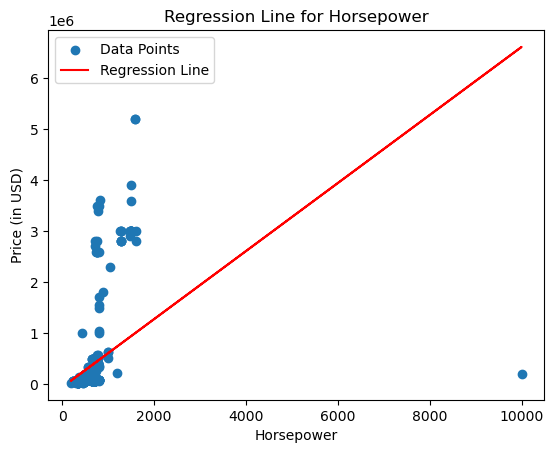

In [39]:
# Calculate the regression line formula
slope, intercept, r_value, p_value, std_err = linregress(pf['Horsepower'], pf['Price (in USD)'])

# Display the regression line formula
print(f"Regression line formula: y = {slope}x + {intercept}")

# Calculate the regression line
regression_line = slope * pf['Horsepower'] + intercept

# Plot the data points and the regression line
plt.scatter(pf['Horsepower'], pf['Price (in USD)'], label='Data Points')
plt.plot(pf['Horsepower'], regression_line, color='red', label='Regression Line')
plt.xlabel('Horsepower')
plt.ylabel('Price (in USD)')
plt.title('Regression Line for Horsepower')
plt.legend()

plt.show()

Regression line formula: y = -461650.8482128847x + 2025732.5515792018


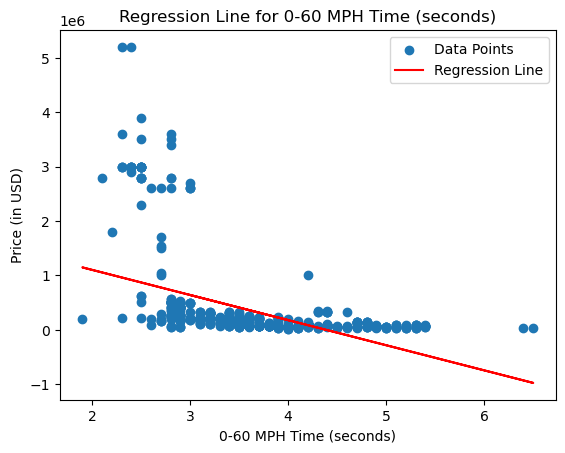

In [40]:

# Calculate the regression line formula
slope, intercept, r_value, p_value, std_err = linregress(pf['0-60 MPH Time (seconds)'], pf['Price (in USD)'])

# Display the regression line formula
print(f"Regression line formula: y = {slope}x + {intercept}")

# Calculate the regression line
regression_line = slope * pf['0-60 MPH Time (seconds)'] + intercept

# Plot the data points and the regression line
plt.scatter(pf['0-60 MPH Time (seconds)'], pf['Price (in USD)'], label='Data Points')
plt.plot(pf['0-60 MPH Time (seconds)'], regression_line, color='red', label='Regression Line')
plt.xlabel('0-60 MPH Time (seconds)')
plt.ylabel('Price (in USD)')
plt.title('Regression Line for 0-60 MPH Time (seconds)')
plt.legend()


plt.show()


Regression line formula: y = 879.7419194826019x + -116894.40309086168


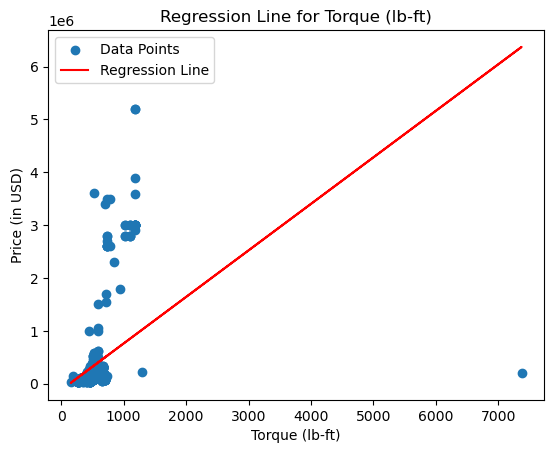

In [41]:

# Calculate the regression line formula
slope, intercept, r_value, p_value, std_err = linregress(pf['Torque (lb-ft)'], pf['Price (in USD)'])

# Display the regression line formula
print(f"Regression line formula: y = {slope}x + {intercept}")

# Calculate the regression line
regression_line = slope * pf['Torque (lb-ft)'] + intercept

# Plot the data points and the regression line
plt.scatter(pf['Torque (lb-ft)'], pf['Price (in USD)'], label='Data Points')
plt.plot(pf['Torque (lb-ft)'], regression_line, color='red', label='Regression Line')
plt.xlabel('Torque (lb-ft)')
plt.ylabel('Price (in USD)')
plt.title('Regression Line for Torque (lb-ft)')
plt.legend()


plt.show()


### Histogram graphs

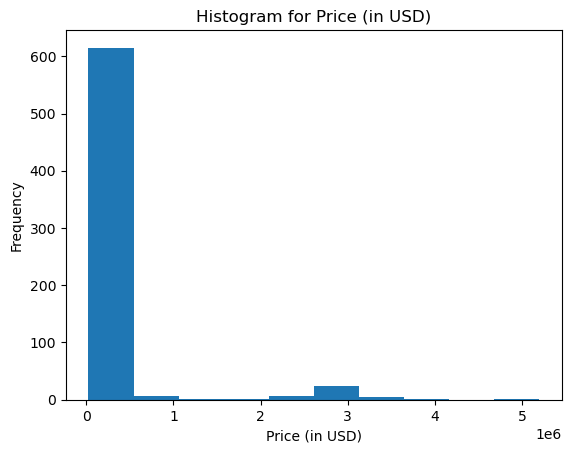

In [42]:
pf['Price (in USD)'].plot(kind='hist')
plt.xlabel('Price (in USD)')
plt.title('Histogram for Price (in USD)')

plt.show()

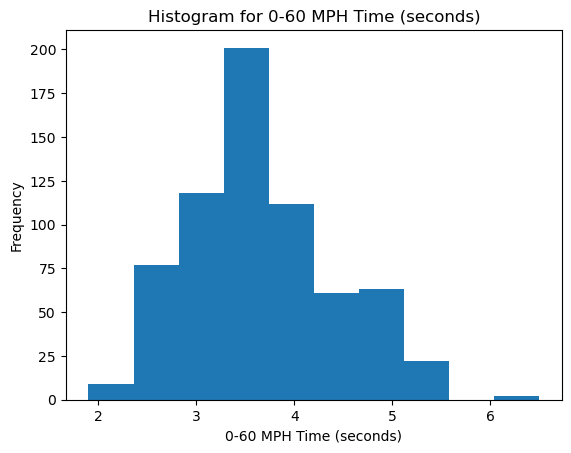

In [43]:
pf['0-60 MPH Time (seconds)'].plot(kind='hist')
plt.xlabel('0-60 MPH Time (seconds)')
plt.title('Histogram for 0-60 MPH Time (seconds)')

plt.show()

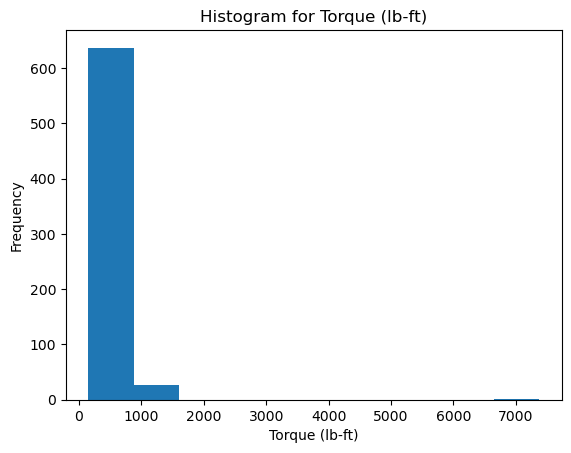

In [44]:
pf['Torque (lb-ft)'].plot(kind='hist')
plt.xlabel('Torque (lb-ft)')
plt.title('Histogram for Torque (lb-ft)')

plt.show()

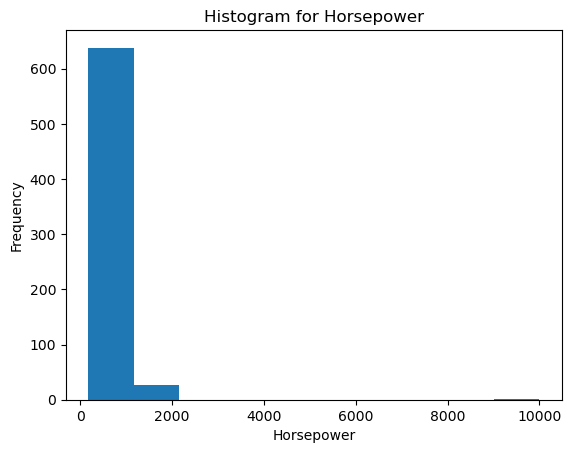

In [45]:
pf['Horsepower'].plot(kind='hist')
plt.xlabel('Horsepower')
plt.title('Histogram for Horsepower')

plt.show()

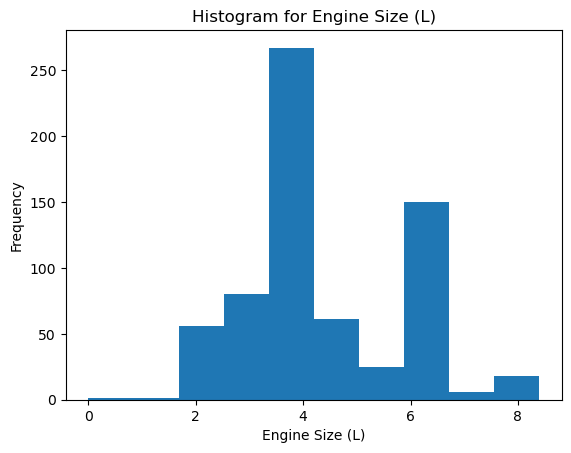

In [46]:
pf['Engine Size (L)'].plot(kind='hist')
plt.xlabel('Engine Size (L)')
plt.title('Histogram for Engine Size (L)')

plt.show()


## <span style='color:purple'> More Graphs</span>


### <span style='color:blue'> Violin plot</span>

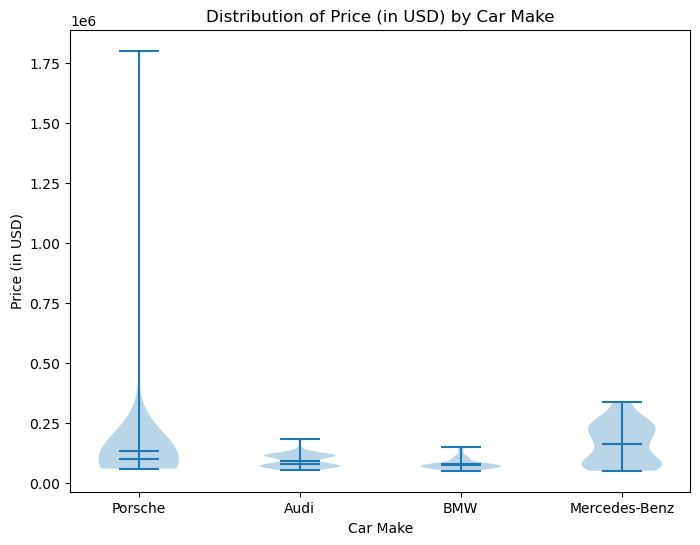

In [49]:
plt.figure(figsize=(8,6))
plt.title('Distribution of Price (in USD) by Car Make')
plt.xlabel('Car Make')
plt.ylabel('Price (in USD)')
plt.violinplot([pf[pf['Car Make']=='Porsche']['Price (in USD)'], pf[pf['Car Make']=='Audi']['Price (in USD)'], pf[pf['Car Make']=='BMW']['Price (in USD)'], pf[pf['Car Make']=='Mercedes-Benz']['Price (in USD)']], showmeans=True, showmedians=True)
plt.xticks([1, 2, 3, 4], ['Porsche', 'Audi','BMW', 'Mercedes-Benz'])

# Display the plot
plt.show()

### <span style='color:blue'> Hexbin plot</span>

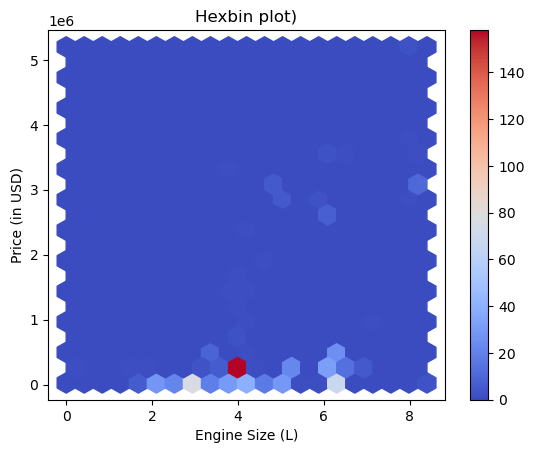

In [50]:


# Create the hexbin plot
pf.plot.hexbin( x='Engine Size (L)',y='Price (in USD)', gridsize=20, cmap='coolwarm')

plt.title('Hexbin plot)')
# Show the plot
plt.show()


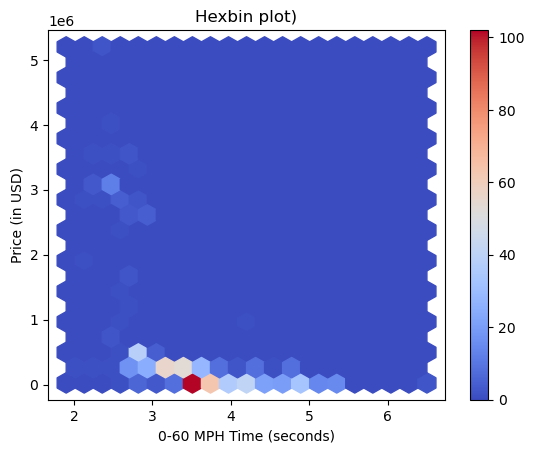

In [51]:
# Create the hexbin plot
pf.plot.hexbin( x='0-60 MPH Time (seconds)',y='Price (in USD)', gridsize=20, cmap='coolwarm')

plt.title('Hexbin plot)')
# Show the plot
plt.show()


## Car makers on this dataset

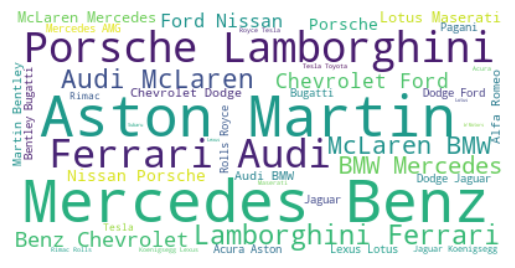

In [52]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd

pf=pd.read_csv('Sport_car.csv')
text = ' '.join(pf['Car Make'])
wordcloud = WordCloud(background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


<br>
<br>
My goal in selecting a sports car prices dataset is to investigate the influence of various performance features, including horsepower, engine size, acceleration capabilities, and torque (lb-ft), on the prices set by car manufacturers for sports cars. Furthermore, determine which of these features has the strongest impact on pricing decisions.

### <span style='color:blue'> Conclusion</span>

The statistical analysis shows a relationship between car prices and performance features such as horsepower, engine size, and torque, as indicated by the positive covariance values. This means that as the performance features increase, the prices of cars tend to increase as well. On the other hand, acceleration capabilities have a negative covariance value with prices, indicating that as acceleration capabilities increase, prices tend to decrease.

Furthermore, the correlation coefficients between car prices and performance features suggest a weak positive correlation between prices and each of these features (horsepower, engine size, and torque). At the same time, there is a weak negative correlation between prices and acceleration capabilities.


Based on the covariance and correlation analysis, there is a weak tendency for car prices to increase with an increase in performance features such as horsepower, engine size, and torque. Conversely, there is a weak tendency for car prices to decrease as acceleration capabilities increase."

## Reflections:
The major difference between Excel and Python is that Excel is a spreadsheet application that uses a graphical user interface (GUI), while Python is a programming language that requires coding. Excel is suitable for simple data analysis tasks, whereas Python is more powerful in terms of data manipulation and
statistical analysis. In terms of when to use them, Excel is ideal for small datasets and quick analysis that does not require complex algorithms or extensive data manipulation. Python, on
the other hand, is suitable for larger datasets and complex analyses.

If I could do this assignment over, what would I do differently?
I would use more markdown languages to make my presentation more visually appealing than this one.
 
 gaps in my programming or stats knowledge
I am interested in expanding my knowledge of plotting various graphs in Python, Pandas, and NumPy without relying on external resources. Additionally, I aim to develop a deeper understanding of statistics to conclude data analysis effectively. This includes considering all variables that may impact the relationships between variables under examination."